# ScaffoldGraph: Simple functions

ScaffoldGraph has some simple functions allowing a user to generate murcko fragments from rdkit molecules.

* get_all_murcko_fragments
* get_next_murcko_fragments

ScaffoldGraph can also generate murcko fragments from rdkit molecules using the scaffold tree method.

* tree_frags_from_mol

(All of these functions are independent of the NetworkX interface)

In [1]:
# Import scaffoldgraph
import scaffoldgraph as sg

# Import rdkit
from rdkit.Chem import Draw
from rdkit import Chem

RDKit WARNING: [12:22:49] Enabling RDKit 2019.09.3 jupyter extensions


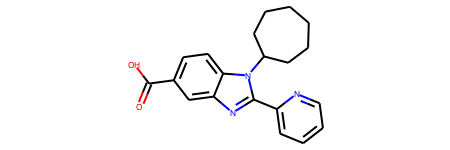

In [2]:
# Create a molecule from a SMILES string

mol = Chem.MolFromSmiles('O=C(O)c1ccc2c(c1)nc(-c1ccccn1)n2C1CCCCCC1')
mol

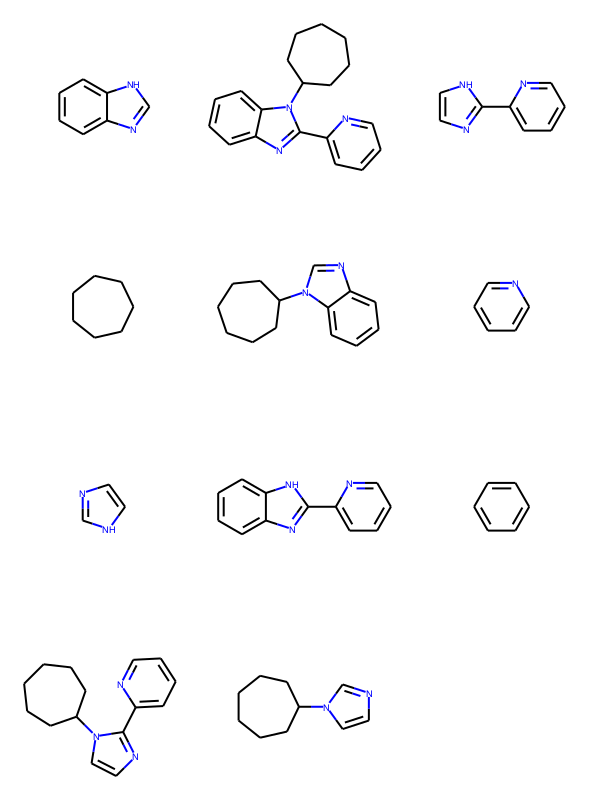

In [3]:
# We can generate all possible murcko fragments using scaffoldgraph
# returned fragments are rdkit molecules

frags = sg.get_all_murcko_fragments(mol)
Draw.MolsToGridImage(frags)

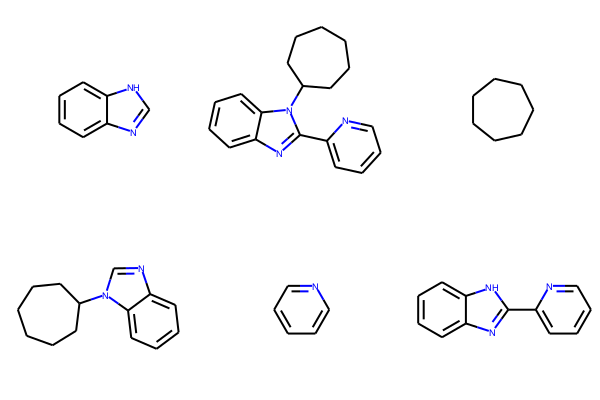

In [4]:
# We can also force the fragmenter not to break fused ring systems

frags = sg.get_all_murcko_fragments(mol, break_fused_rings=False)
Draw.MolsToGridImage(frags)

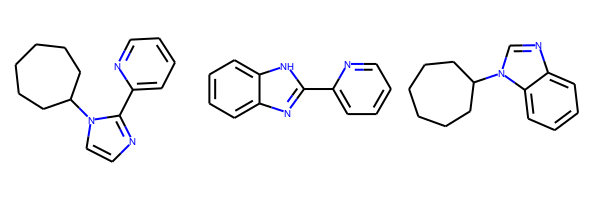

In [5]:
# Instead of returning all possible fragments we can just return the next hierarchy
# This method assumes that a murcko scaffold is supplied

scaffold = Chem.Scaffolds.MurckoScaffold.GetScaffoldForMol(mol)
frags = sg.get_next_murcko_fragments(scaffold)
Draw.MolsToGridImage(frags)

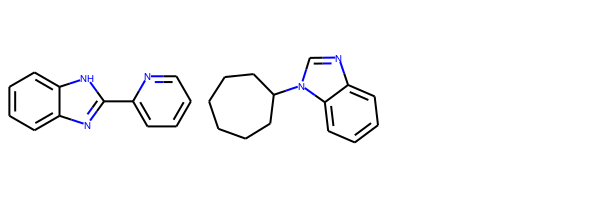

In [6]:
# We can also force this method to not break fused ring systems

frags = sg.get_next_murcko_fragments(scaffold, break_fused_rings=False)
Draw.MolsToGridImage(frags)

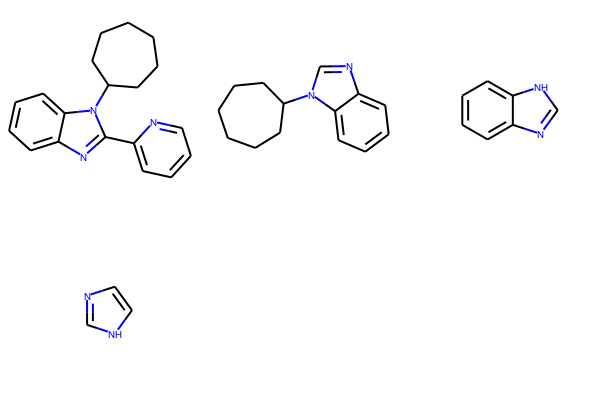

In [7]:
# Scaffoldgraph can also create murcko fragments using the scaffold tree method
# The rules used to prioritize fragments are the same as the original publication

frags = sg.tree_frags_from_mol(mol)
Draw.MolsToGridImage(frags)